# Ejemplo de analisis de estudiantes

Lucho Nov| 2023

## Packages | Librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Import Datasets

In [2]:
url = "https://www.kaggle.com/datasets/lainguyn123/student-performance-factors"

df = pd.read_csv("StudentPerformanceFactors.csv")
df_raw = df.copy()
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#### EDA

In [6]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Procesamiento

In [ ]:
#Variables numericas

num_feactures = df.select_dtypes(include=["int"]).columns

#variables categoricas

cat_feactures = df.select_dtypes(include=["object"]).columns

## Categoricas en numeros

label_encoder = LabelEncoder()

for col in cat_feactures:
    df[col] = label_encoder.fit_transform(df[col])


df.head()


#Normalizacion

minmax_sclaler = MinMaxScaler(feature_range=(0,1))

df[num_feactures] = minmax_sclaler.fit_transform(df[num_feactures])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,0.5,0.0,0.0,0.500000,0.46,0.5,1.0,0.000,0.5,0.666667,1.0,1.0,0.500000,0.0,0.333333,0.666667,1.0,0.260870
1,0.418605,0.100,0.5,1.0,0.0,0.666667,0.18,0.5,1.0,0.250,1.0,0.666667,1.0,0.0,0.666667,0.0,0.000000,0.333333,0.0,0.130435
2,0.534884,0.950,1.0,1.0,1.0,0.500000,0.82,1.0,1.0,0.250,1.0,0.666667,1.0,0.5,0.666667,0.0,0.666667,0.666667,1.0,0.413043
3,0.651163,0.725,0.5,1.0,1.0,0.666667,0.96,1.0,1.0,0.125,1.0,0.666667,1.0,0.0,0.666667,0.0,0.333333,0.333333,1.0,0.347826
4,0.418605,0.800,1.0,1.0,1.0,0.333333,0.30,1.0,1.0,0.375,1.0,0.000000,1.0,0.5,0.666667,0.0,0.000000,0.666667,0.0,0.326087


In [11]:
#ELiminar datos nuelos

df["Teacher_Quality"].fillna(df["Teacher_Quality"].mean(), inplace= True)

df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mean(), inplace= True)

df["Distance_from_Home"].fillna(df["Distance_from_Home"].mean(), inplace= True)


df.isna().sum()

C:\Users\Lupin III\AppData\Local\Temp\ipykernel_17816\2605746264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mean(), inplace= True)
C:\Users\Lupin III\AppData\Local\Temp\ipykernel_17816\2605746264.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

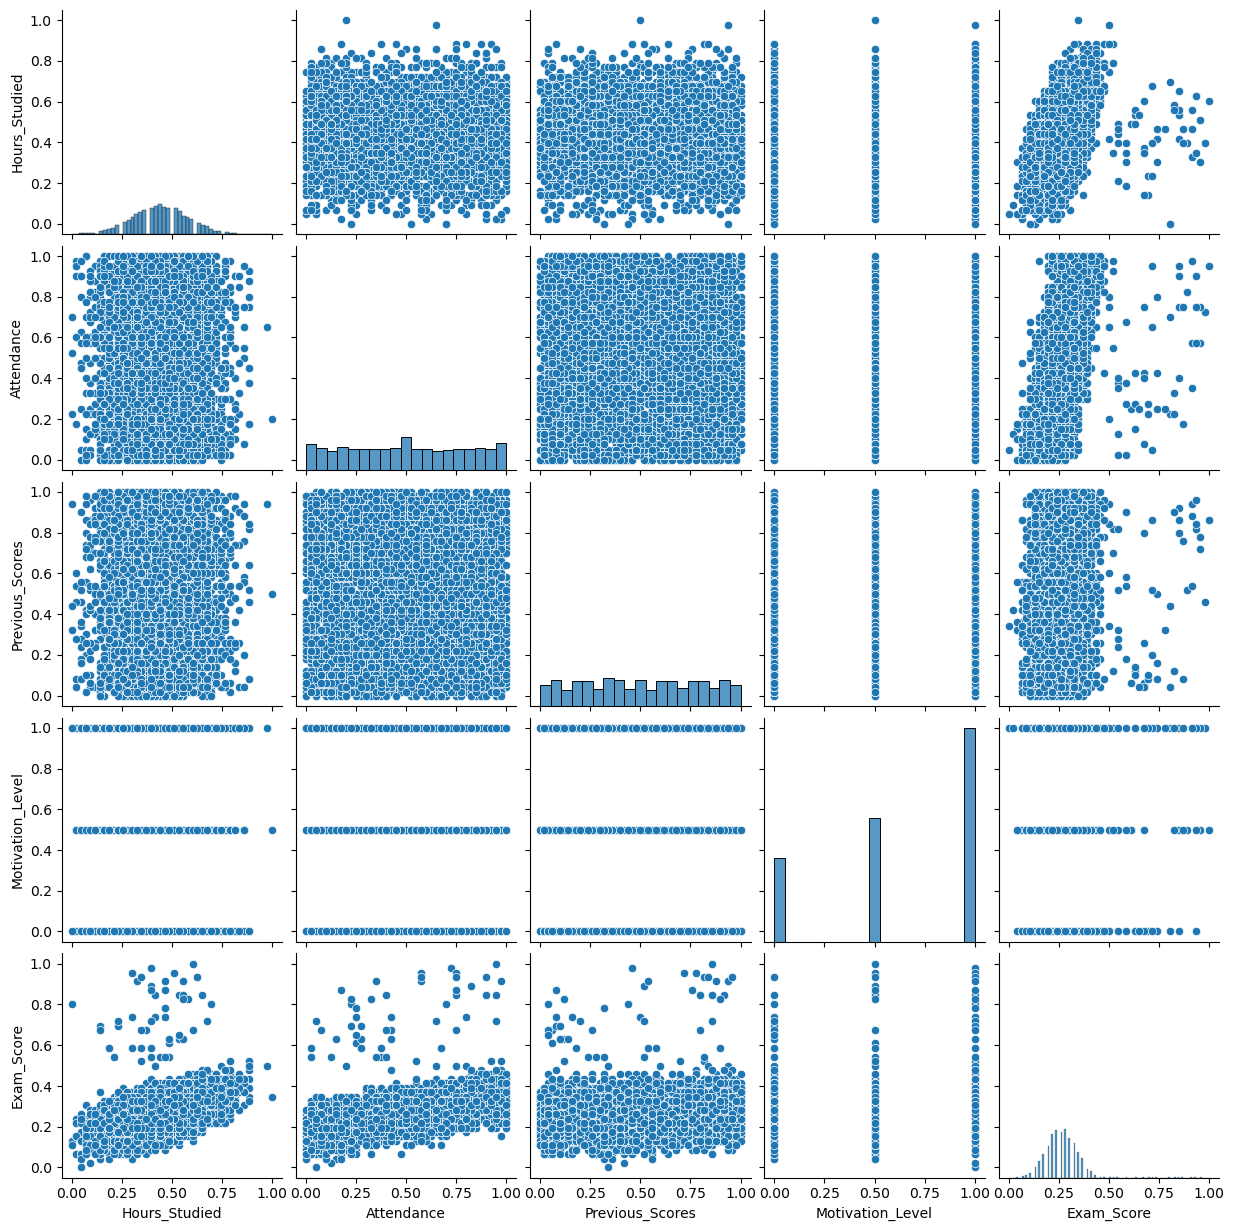

In [12]:
#Crear el pairplot

sns.pairplot(df[["Hours_Studied","Attendance","Previous_Scores","Motivation_Level","Exam_Score"]])
plt.show()

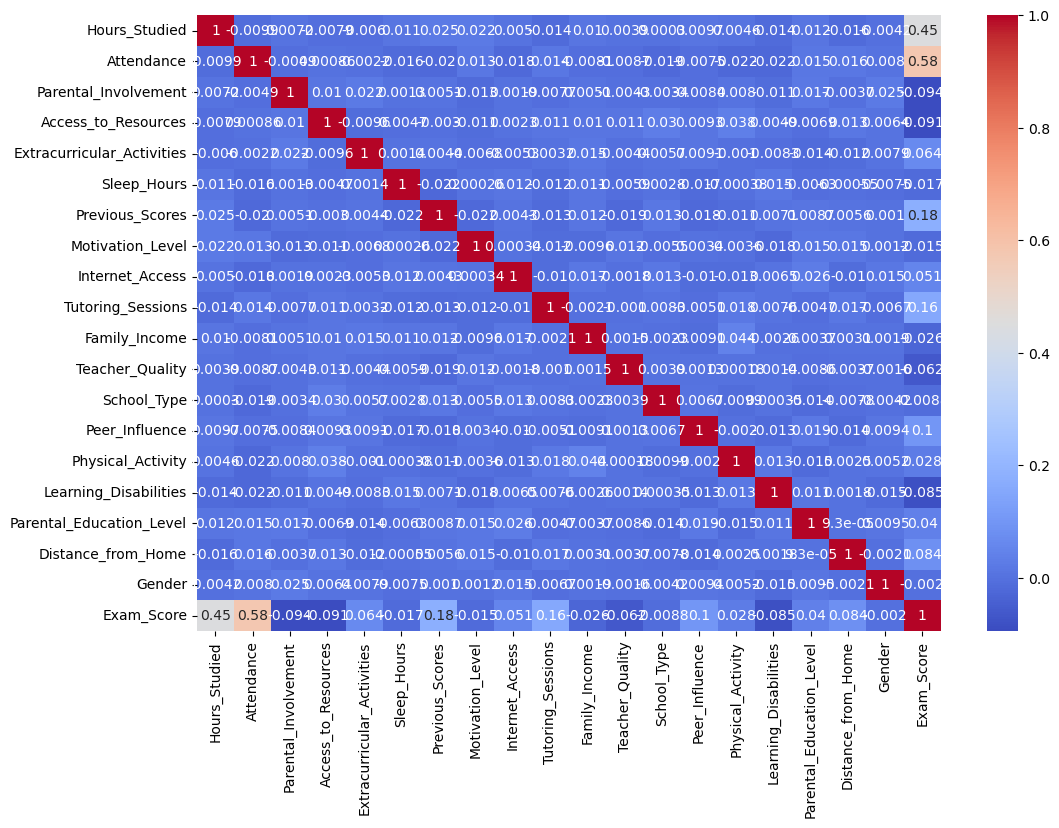

In [13]:
#Correlacion
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [16]:
X= df.drop("Exam_Score", axis=1)
y= df["Exam_Score"]


#Train-test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

### Entrenamiento de modelo

In [17]:
#Llamar al modelo

model_lf = LinearRegression()
model_rf = RandomForestRegressor()

In [18]:
model_lf.fit(X_train,y_train)

LinearRegression()

In [19]:
#prediccion de datos del test
y_pred = model_lf.predict (X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse: ", mse)
print ("r2: ", r2)

mse:  0.0020800507185514934
r2:  0.6886194019277317


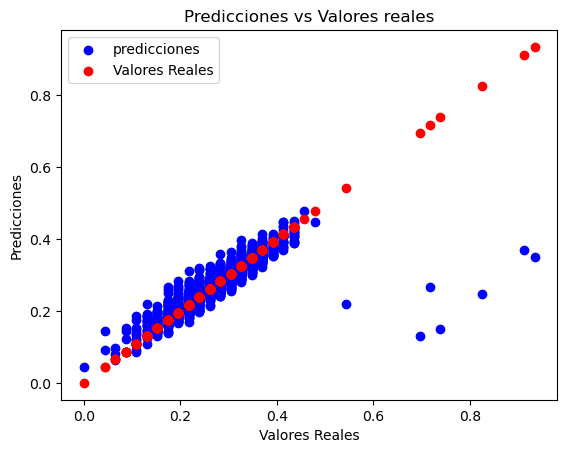

In [23]:
plt.scatter(y_test,y_pred, color="blue", label="predicciones")
plt.scatter(y_test, y_test, color = "red", label="Valores Reales")


plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.legend()

plt.show()